In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
fake_tweets = pd.read_csv('fake.csv')
fake_tweets.head()

,tweet
0,"the tongue of his condition, now i saw things ..."
1,"by god the great, after i saw the derby of wyd..."
2,"believe in god, this zamalek fans are as good ..."
3,the coach appeared in the media and told the t...
4,asno smito\nwhoever knows her tells me a massa...


In [3]:
real_tweets = pd.read_csv('real.csv')
real_tweets.head()

,tweet
0,sun downs technical director: al-ahly respecte...
1,shawky gharib after the tie with enppi: our go...
2,"egyptian sports news today, wednesday 1/25/202..."
3,the main referees committee of the egyptian fo...
4,"haji bari, the striker of the future team, is ..."


# clean the datasets

In [4]:
fake_tweets['tweet'].isna().sum()
real_tweets['tweet'].isna().sum()

6

In [5]:
fake_tweets = fake_tweets.dropna(subset=['tweet'])
fake_tweets['tweet'] = fake_tweets['tweet'].fillna('')

In [6]:
real_tweets = real_tweets.dropna(subset=['tweet'])
real_tweets['tweet'] = real_tweets['tweet'].fillna('')

In [7]:
fake_tweets['tweet'].isna().sum()
real_tweets['tweet'].isna().sum()

0

# eda

<AxesSubplot:xlabel='label', ylabel='count'>

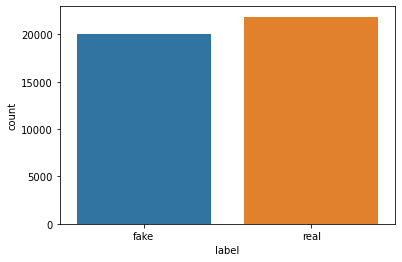

In [8]:
# Create a new column "label" in the fake and real datasets
fake_tweets['label'] = 'fake'
real_tweets['label'] = 'real'

# Concatenate the two datasets
tweets = pd.concat([fake_tweets, real_tweets], ignore_index=True)

# Plot the countplot of target variable "label"
sns.countplot(x='label', data=tweets)

<AxesSubplot:xlabel='char_count', ylabel='Count'>

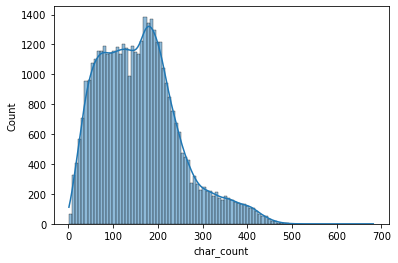

In [9]:
# count the number of characters in the tweet
tweets['char_count'] = tweets['tweet'].apply(len)
sns.histplot(data=tweets, x='char_count', kde=True)

<AxesSubplot:xlabel='word_count', ylabel='Count'>

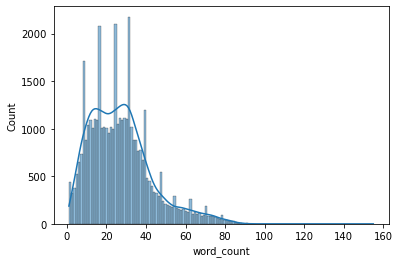

In [10]:
# count the number of words in each tweet
tweets['word_count'] = tweets['tweet'].apply(lambda x: len(x.split()))
sns.histplot(data=tweets, x='word_count', kde=True)

<AxesSubplot:xlabel='unique_word_count', ylabel='Count'>

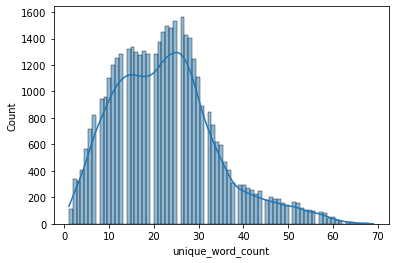

In [11]:
# count the number of unique words in each tweet
tweets['unique_word_count'] = tweets['tweet'].apply(lambda x: len(set(x.split())))
sns.histplot(data=tweets, x='unique_word_count', kde=True)

<AxesSubplot:xlabel='hashtag_count', ylabel='Count'>

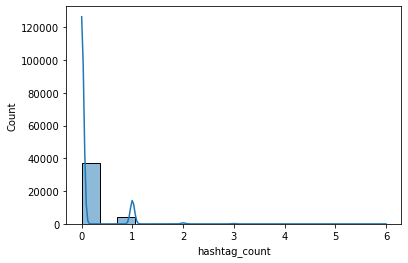

In [12]:
# count the number of hashtags in each tweet
tweets['hashtag_count'] = tweets['tweet'].apply(lambda x: len([c for c in x if c == '#']))
sns.histplot(data=tweets, x='hashtag_count', kde=True)

<AxesSubplot:xlabel='mention_count', ylabel='Count'>

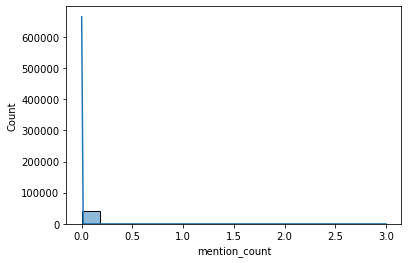

In [13]:
# count the number of mentions in each tweet
tweets['mention_count'] = tweets['tweet'].apply(lambda x: len([c for c in x if c == '@']))
sns.histplot(data=tweets, x='mention_count', kde=True)

<AxesSubplot:xlabel='url_count', ylabel='Count'>

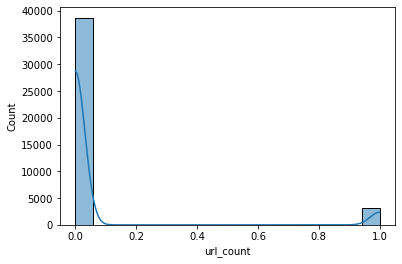

In [14]:
# count the number of URLs in each tweet
tweets['url_count'] = tweets['tweet'].apply(lambda x: len([w for w in x.split() if 'http' in w]))
sns.histplot(data=tweets, x='url_count', kde=True)

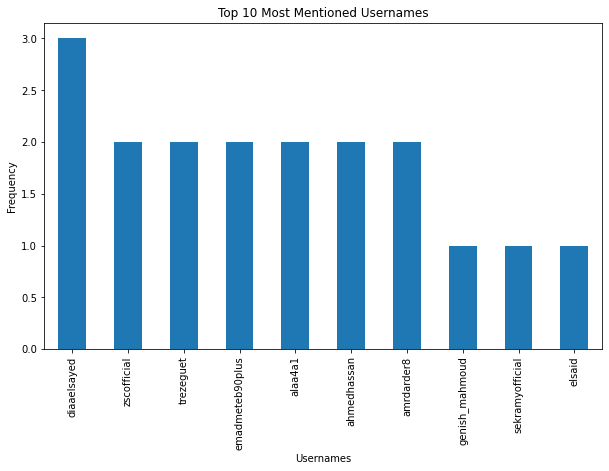

In [15]:
import re

# Extract usernames from the tweet text using regular expression
usernames = tweets['tweet'].apply(lambda x: re.findall(r'@(\w+)', x)).tolist()

# Flatten the list of usernames
usernames_flat = [username for sublist in usernames for username in sublist]

# Count the frequency of each username
usernames_count = pd.Series(usernames_flat).value_counts().sort_values(ascending=False)

# Plot the top 10 most mentioned usernames
plt.figure(figsize=(10, 6))
usernames_count.head(10).plot(kind='bar')
plt.title('Top 10 Most Mentioned Usernames')
plt.xlabel('Usernames')
plt.ylabel('Frequency')
plt.show()


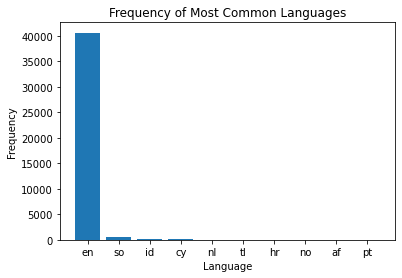

In [16]:
import langdetect
from collections import Counter

# Define a function to detect the language of a tweet
def detect_language(text):
    try:
        return langdetect.detect(text)
    except:
        return 'unknown'

# Apply the detect_language function to each tweet
tweets['language'] = tweets['tweet'].apply(detect_language)

# Plot the frequency of the most common languages
language_counts = Counter(tweets['language'])
language_counts = dict(sorted(language_counts.items(), key=lambda item: item[1], reverse=True)[:10])
plt.bar(language_counts.keys(), language_counts.values())
plt.title('Frequency of Most Common Languages')
plt.xlabel('Language')
plt.ylabel('Frequency')
plt.show()

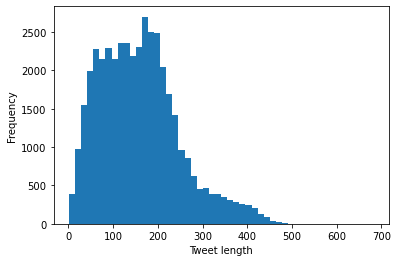

In [17]:
# Create a new column with the length of each tweet
tweets['tweet_len'] = tweets['tweet'].apply(len)

# Plot the distribution of tweet lengths
plt.hist(tweets['tweet_len'], bins=50)
plt.xlabel('Tweet length')
plt.ylabel('Frequency')
plt.show()

In [18]:
import nltk
from nltk.corpus import stopwords
from collections import Counter

# Download the stopwords corpus if necessary
nltk.download('stopwords')

# Create a list of all words in the tweets
all_words = [word for tweet in tweets['tweet'] for word in tweet.split()]

# Remove stop words
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in all_words if word.lower() not in stop_words]

# Count the frequency of each word
word_counts = Counter(filtered_words)

# Get the 10 most common words
top_words = word_counts.most_common(10)
print(top_words)

[nltk_data] Downloading package stopwords to C:\Users\Henry
[nltk_data]     Morgan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('al-ahly', 10690), ('_', 7768), ('team', 6974), ('zamalek', 6815), ('league', 6804), ('match', 5992), ('haha', 4821), ('club', 4715), ('egyptian', 4572), ('football', 3998)]


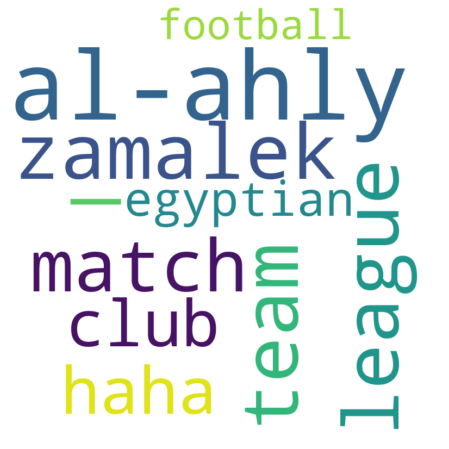

In [19]:
from wordcloud import WordCloud

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=50)

# Generate a word cloud from the most common words
wordcloud.generate_from_frequencies(dict(top_words))

# Display the word cloud
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [20]:
# Combine the two datasets into one and shuffle the rows
tweets = pd.concat([fake_tweets, real_tweets]).sample(frac=1, random_state=1).reset_index(drop=True)

In [21]:
# Preview the data
print(tweets.head())

# Check the shape of the data
print(tweets.shape)

# Check the data types of the columns
print(tweets.dtypes)

# Check for duplicated rows
print(tweets.duplicated().sum())

                                               tweet label
0  helmy tolan, manager of the national bank team...  real
1  now i saw the summary of the city run..\njudgi...  fake
2  ismaili concludes his preparations for the cou...  real
3  al-ahly basket team faces insurance, and zamal...  real
4   ya dawry\nwhen you know the victory center an...  fake
(41851, 2)
tweet    object
label    object
dtype: object
1027


In [22]:
tweets.columns

Index(['tweet', 'label'], dtype='object')

# train and test with different models

In [23]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split

# Add a new column indicating the label of the tweet (0 for fake, 1 for real)
fake_tweets['label'] = 0
real_tweets['label'] = 1


# Split the data into a training set and a test set
train_tweets, test_tweets = train_test_split(tweets, test_size=0.2, random_state=1)

# Clean and preprocess the data
def clean_text(text):
    if pd.isna(text):
        return ''
    # Convert text to lowercase
    text = text.lower()
    # Remove URLs and usernames
    text = re.sub(r'http\S+|www\S+|https\S+|@\S+', '', text, flags=re.MULTILINE)
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text, flags=re.MULTILINE)
    return text

train_tweets['tweet'] = train_tweets['tweet'].fillna('').apply(clean_text)
test_tweets['tweet'] = test_tweets['tweet'].fillna('').apply(clean_text)


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TfidfVectorizer object
tfidf = TfidfVectorizer()

# Fit and transform the training data
X_train = tfidf.fit_transform(train_tweets['tweet'])

# Transform the test data
X_test = tfidf.transform(test_tweets['tweet'])

# Get the corresponding labels for the training and test data
y_train = train_tweets['label']
y_test = test_tweets['label']

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Vectorize the preprocessed tweets using TF-IDF
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_tweets['tweet'])
X_test = vectorizer.transform(test_tweets['tweet'])
y_train = train_tweets['label']
y_test = test_tweets['label']

# Define the logistic regression model
logreg = LogisticRegression()

# Define the hyperparameter space to search over
params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Define the cross-validation scheme
cv = StratifiedKFold(n_splits=5)

# Use grid search to tune the hyperparameters
grid_search = GridSearchCV(logreg, params, cv=cv, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the cross-validation score
print(f"Best hyperparameters: {grid_search.best_params_}")
print(f"CV score: {grid_search.best_score_}")

# Train the logistic regression model on the full training set using the best hyperparameters
logreg = LogisticRegression(**grid_search.best_params_)
logreg.fit(X_train, y_train)

# Evaluate the performance of the model on the test set
test_score = logreg.score(X_test, y_test)
print(f"Test score: {test_score}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best hyperparameters: {'C': 10, 'penalty': 'l2'}
CV score: 0.9571385902031064
Test score: 0.9554414048500777


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Vectorize the preprocessed tweets using TF-IDF
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_tweets['tweet'])
X_test = vectorizer.transform(test_tweets['tweet'])
y_train = train_tweets['label']
y_test = test_tweets['label']

# Initialize the model
rf = RandomForestClassifier()

# Define the hyperparameter grid to search over
param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [5, 10, 15],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

# Define the cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create a grid search object to find the best hyperparameters
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=cv, scoring='f1')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and cross-validation score
print('Best hyperparameters:', grid_search.best_params_)
print('CV score:', grid_search.best_score_)

# Train the random forest classifier model on the full training set using the best hyperparameters
rf = RandomForestClassifier(**grid_search.best_params_)
rf.fit(X_train, y_train)

# Evaluate the model on the test data
test_score = rf.score(X_test, y_test)
print('Test score:', test_score)

Best hyperparameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
CV score: nan
Test score: 0.8583203918289333


In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Vectorize the preprocessed tweets using TF-IDF
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_tweets['tweet'])
X_test = vectorizer.transform(test_tweets['tweet'])
y_train = train_tweets['label']
y_test = test_tweets['label']

# Initialize the model
dtc = DecisionTreeClassifier()

# Define the hyperparameter grid to search over
param_grid = {'max_depth': [5, 10, 15],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

# Define the cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create a grid search object to find the best hyperparameters
grid_search = GridSearchCV(dtc, param_grid=param_grid, cv=cv, scoring='f1')
grid_search.fit(X_train, y_train)


# Print the best hyperparameters and cross-validation score
print('Best hyperparameters:', grid_search.best_params_)
print('CV score:', grid_search.best_score_)

# Train the decsion tree classifier model on the full training set using the best hyperparameters
dtc = DecisionTreeClassifier(**grid_search.best_params_)
dtc.fit(X_train, y_train)

# Evaluate the model on the test data
test_score = dtc.score(X_test, y_test)
print('Test score:', test_score)

Best hyperparameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
CV score: nan
Test score: 0.8191374985067494


# logistic regression turns out to be the best model so i evaluated it

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Use the trained logistic regression model to predict the sentiment labels of the test tweets
y_pred = logreg.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)

Accuracy: 0.9554414048500777
Precision: 0.9554850906758677
Recall: 0.9554414048500777
F1-score: 0.9554483825534174


# exploring misclassified instances

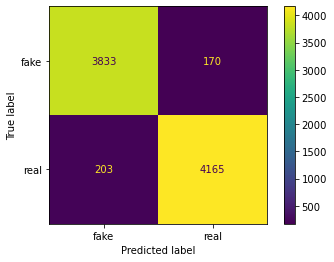

In [30]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(logreg, X_test, y_test)

In [31]:
# Convert the series to numpy arrays
y_test = np.array(y_test)
y_pred = np.array(y_pred)

# Find the indices of misclassified instances
misclassified_idx = np.nonzero(y_test != y_pred)[0]

# Print the misclassified instances and their true labels
for idx in misclassified_idx:
    print('Tweet:', test_tweets.iloc[idx]['tweet'])
    print('True label:', test_tweets.iloc[idx]['label'])
    print()

Tweet: the first goal for alahly
True label: real

Tweet: by god it was as if the one who was going to play the match was anxious tense and fearful even during the playing days the one would remain completely calm god willing we will come back with the cup and it will be the tenth my family
True label: real

Tweet: what is egypt happy with defeating alahly
egypts hopes sleep sad de eh
True label: fake

Tweet: ahmed sami elhadary john is a great man who is difficult to repeat but elhani suleiman is from the same family as elhadary
True label: real

Tweet: kamel alwazir decides to thank the portuguese  the technical director of the  team and decides to appoint osama nabih and keep the chick amir after his fathers board of directors  met with himself
True label: fake

Tweet: kevin johnson alahly has signed distinguished players and will benefit from them in the champions league
True label: real

Tweet: mortada mansour the meeting took place with the officials of future and it was agreed t

In [32]:
!pip install textblob


[notice] A new release of pip is available: 23.0 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
# Get the predicted labels for the test data
y_pred = logreg.predict(X_test)

# Find the misclassified instances
misclassified = X_test[y_test != y_pred]

# Convert the misclassified instances back to their original form
misclassified_tweets = vectorizer.inverse_transform(misclassified)

# Print some examples of misclassified tweets
for i in range(10):
    print('Misclassified tweet:', misclassified_tweets[i])
    print('True label:', y_test[y_test != y_pred][i])
    print('Predicted label:', y_pred[y_test != y_pred][i])
    print()

Misclassified tweet: ['alahly' 'first' 'for' 'goal' 'the']
True label: real
Predicted label: fake

Misclassified tweet: ['and' 'anxious' 'as' 'back' 'be' 'by' 'calm' 'come' 'completely' 'cup'
 'days' 'during' 'even' 'family' 'fearful' 'god' 'going' 'if' 'it' 'match'
 'my' 'one' 'play' 'playing' 'remain' 'tense' 'tenth' 'the' 'to' 'was'
 'we' 'who' 'will' 'willing' 'with' 'would']
True label: real
Predicted label: fake

Misclassified tweet: ['alahly' 'de' 'defeating' 'egypt' 'egypts' 'eh' 'happy' 'hopes' 'is'
 'sad' 'sleep' 'what' 'with']
True label: fake
Predicted label: real

Misclassified tweet: ['ahmed' 'as' 'but' 'difficult' 'elhadary' 'elhani' 'family' 'from'
 'great' 'is' 'john' 'man' 'repeat' 'same' 'sami' 'suleiman' 'the' 'to'
 'who']
True label: real
Predicted label: fake

Misclassified tweet: ['after' 'alwazir' 'amir' 'and' 'appoint' 'board' 'chick' 'decides'
 'director' 'directors' 'fathers' 'himself' 'his' 'kamel' 'keep' 'met'
 'nabih' 'of' 'osama' 'portuguese' 'team' 'tech

In [34]:
misclassified_tweets

[array(['alahly', 'first', 'for', 'goal', 'the'], dtype='<U566'),
 array(['and', 'anxious', 'as', 'back', 'be', 'by', 'calm', 'come',
        'completely', 'cup', 'days', 'during', 'even', 'family', 'fearful',
        'god', 'going', 'if', 'it', 'match', 'my', 'one', 'play',
        'playing', 'remain', 'tense', 'tenth', 'the', 'to', 'was', 'we',
        'who', 'will', 'willing', 'with', 'would'], dtype='<U566'),
 array(['alahly', 'de', 'defeating', 'egypt', 'egypts', 'eh', 'happy',
        'hopes', 'is', 'sad', 'sleep', 'what', 'with'], dtype='<U566'),
 array(['ahmed', 'as', 'but', 'difficult', 'elhadary', 'elhani', 'family',
        'from', 'great', 'is', 'john', 'man', 'repeat', 'same', 'sami',
        'suleiman', 'the', 'to', 'who'], dtype='<U566'),
 array(['after', 'alwazir', 'amir', 'and', 'appoint', 'board', 'chick',
        'decides', 'director', 'directors', 'fathers', 'himself', 'his',
        'kamel', 'keep', 'met', 'nabih', 'of', 'osama', 'portuguese',
        'team', 'tech

In [35]:
import gensim
from gensim import corpora
from sklearn.decomposition import LatentDirichletAllocation

# Assume that 'misclassified_tweets' is a list of preprocessed misclassified tweets

# Create a dictionary from the misclassified tweets
dictionary = corpora.Dictionary(misclassified_tweets)

# Convert the misclassified tweets to a bag-of-words representation
corpus = [dictionary.doc2bow(tweet) for tweet in misclassified_tweets]

# Train the LDA model on the misclassified tweets
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=10, passes=10)

# Print the topics and their corresponding top words
for topic in lda_model.print_topics():
    print(topic)

(0, '0.025*"and" + 0.021*"the" + 0.016*"in" + 0.014*"with" + 0.013*"of" + 0.013*"is" + 0.012*"to" + 0.011*"it" + 0.009*"you" + 0.008*"that"')
(1, '0.029*"in" + 0.024*"the" + 0.016*"of" + 0.014*"zamalek" + 0.013*"for" + 0.012*"is" + 0.012*"football" + 0.011*"and" + 0.009*"with" + 0.008*"what"')
(2, '0.033*"the" + 0.026*"to" + 0.025*"is" + 0.021*"and" + 0.017*"of" + 0.015*"alahly" + 0.012*"in" + 0.009*"do" + 0.009*"will" + 0.008*"zamalek"')
(3, '0.038*"the" + 0.028*"and" + 0.019*"is" + 0.018*"for" + 0.017*"to" + 0.016*"zamalek" + 0.016*"in" + 0.015*"alahly" + 0.013*"that" + 0.013*"god"')
(4, '0.045*"the" + 0.026*"to" + 0.023*"and" + 0.021*"in" + 0.018*"is" + 0.018*"of" + 0.014*"zamalek" + 0.013*"cup" + 0.011*"league" + 0.011*"world"')
(5, '0.033*"the" + 0.023*"and" + 0.022*"of" + 0.021*"alahly" + 0.016*"for" + 0.014*"is" + 0.013*"zamalek" + 0.013*"to" + 0.010*"are" + 0.010*"in"')
(6, '0.022*"is" + 0.019*"the" + 0.018*"in" + 0.017*"of" + 0.017*"to" + 0.017*"and" + 0.013*"zamalek" + 0.012*

# predict the sentiment of the misclassified tweets and compare it to the predicted sentiment label of the model.

In [36]:
from textblob import TextBlob

# sample tweet
tweet = "I hated that movie, it was terrible!"

# create a TextBlob object
blob = TextBlob(tweet)

# get sentiment polarity and subjectivity
sentiment = blob.sentiment

# print sentiment polarity and subjectivity
print(sentiment.polarity, sentiment.subjectivity)

-0.95 0.85


# a word cloud of the most frequent words in the misclassified tweets to identify any patterns or common themes. 

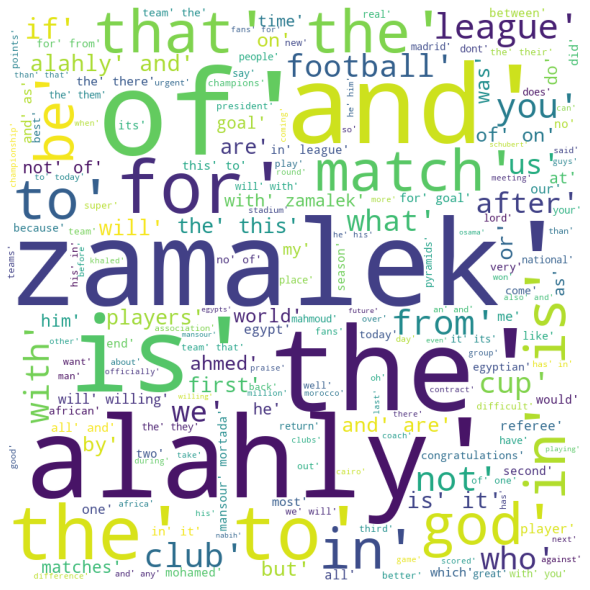

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Convert misclassified tweets to list of strings
misclassified_tweets_list = [tweet.tolist() if isinstance(tweet, np.ndarray) else tweet for tweet in misclassified_tweets]
misclassified_tweets_str = ' '.join([str(tweet) for tweet in misclassified_tweets_list])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=800, 
                      background_color='white', 
                      min_font_size=10).generate(misclassified_tweets_str)
  
# Plot the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
  
plt.show()


# error analysis

In [38]:
# assuming you have a misclassified_tweets list containing the misclassified tweets
# and their predicted and actual labels

import random
import numpy as np

# randomly sample 10 misclassified tweets
sample_tweets = random.sample(misclassified_tweets, 10)

# manually examine the tweets and their predicted and actual labels
for tweet in sample_tweets:
    tweet_dict = tweet.tolist() if isinstance(tweet, np.ndarray) else tweet
    print("Tweet: ", tweet_dict[0] if len(tweet_dict) > 0 else 'N/A')
    print("Predicted label: ", tweet_dict[1] if len(tweet_dict) > 1 else 'N/A')
    actual_label = tweet_dict[2] if len(tweet_dict) > 2 else 'N/A'
    print("Actual label: ", actual_label)
    print()

Tweet:  alahly
Predicted label:  and
Actual label:  back

Tweet:  and
Predicted label:  athletes
Actual label:  but

Tweet:  again
Predicted label:  and
Actual label:  at

Tweet:  adel
Predicted label:  ahmed
Actual label:  all

Tweet:  against
Predicted label:  because
Actual label:  by

Tweet:  alaas
Predicted label:  assist
Actual label:  goal

Tweet:  after
Predicted label:  alahly
Actual label:  caused

Tweet:  alshinawi
Predicted label:  and
Actual label:  any

Tweet:  again
Predicted label:  because
Actual label:  call

Tweet:  and
Predicted label:  any
Actual label:  back



In [39]:
test_set = []
for i in range(X_test.shape[0]):
    test_set.append((X_test[i], y_test[i]))

# collect misclassified tweets
misclassified_tweets = []
for i in range(min(X_test.shape[0], len(y_pred))):
    if y_pred[i] != y_test[i]:
        tweet = {
            'text': test_set[i][0],
            'predicted_label': y_pred[i],
            'actual_label': y_test[i]
        }
        misclassified_tweets.append(tweet)

# print some basic stats
print("Number of misclassified tweets:", len(misclassified_tweets))

# sample some misclassified tweets to manually examine
sample_size = 10
sample_tweets = random.sample(misclassified_tweets, sample_size)

# manually examine the tweets and their predicted and actual labels
for tweet in sample_tweets:
    print("Tweet: ", tweet.get('text', 'N/A'))
    print("Predicted label: ", tweet.get('predicted_label', 'N/A'))
    print("Actual label: ", tweet.get('actual_label', 'N/A'))
    print()


Number of misclassified tweets: 373
Tweet:    (0, 10052)	0.5285587406480775
  (0, 12483)	0.12023511515720989
  (0, 13661)	0.5211080384754504
  (0, 15478)	0.30367069643045264
  (0, 16055)	0.17951956518614923
  (0, 16466)	0.40008051977555004
  (0, 19142)	0.3818785355936162
  (0, 21679)	0.06539711459796993
Predicted label:  real
Actual label:  fake

Tweet:    (0, 3835)	0.2449977799207321
  (0, 4181)	0.17517023730108097
  (0, 6043)	0.3459585303032723
  (0, 8037)	0.3496137748924828
  (0, 8041)	0.3957873849685949
  (0, 9971)	0.09016306628013572
  (0, 15821)	0.2583557041448131
  (0, 17140)	0.6166398871656057
  (0, 21875)	0.07404961017212885
  (0, 22994)	0.13622332271874943
  (0, 23119)	0.14260597451094698
  (0, 23617)	0.10596378720647012
Predicted label:  real
Actual label:  fake

Tweet:    (0, 1458)	0.3689742056096535
  (0, 9419)	0.5026826876458136
  (0, 11340)	0.18175165037495356
  (0, 12483)	0.11882287198709943
  (0, 14775)	0.3866565133166966
  (0, 17566)	0.4672895779718303
  (0, 19719)	0.